In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Outputs will be 0-9, define class names so we can tell what type of clothing it is
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

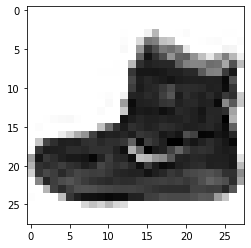

In [ ]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
# What does the image data actually look like?
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
# Contain numbers in range from 0-1 by dividing previous array by 255 (max value)
train_images = train_images / 255.0
test_images = test_images / 255.0

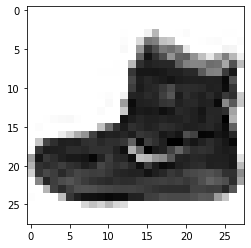

In [ ]:
# Image still looks the same, just compressed in range
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Create the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4974 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3728 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3348 - accuracy: 0.8793
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3128 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2958 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2818 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2669 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2561 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2488 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.239

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3652 - accuracy: 0.8716
Test Accuracy:  0.8715999722480774


In [13]:
# Use the model to make predictions
prediction = model.predict(test_images)
print(prediction)

313/313 [==============================] - 1s 4ms/step
[[1.4694734e-07 1.6116809e-13 1.6639042e-09 ... 4.4566528e-03
  1.1302044e-09 9.9501038e-01]
 [3.1470932e-05 7.7303848e-13 9.9784434e-01 ... 6.4884202e-15
  1.1655836e-08 1.1017841e-11]
 [2.0128515e-07 9.9999958e-01 4.2286258e-11 ... 3.6088801e-22
  1.6415564e-12 3.1963810e-19]
 ...
 [3.6855436e-05 1.1651751e-09 1.5694892e-06 ... 1.4338003e-06
  9.9983978e-01 2.3204359e-11]
 [7.4467603e-06 9.9838978e-01 1.3495496e-07 ... 4.1082607e-16
  4.5109351e-07 7.6550419e-11]
 [6.2974846e-06 4.6758952e-10 3.8015630e-06 ... 2.3484430e-03
  1.0200071e-05 2.6500645e-06]]


In [24]:
print(prediction[0])

for item in prediction[0]:
  print(f"{item*100:.2f}%")

class_likely = class_names[np.argmax(prediction[0])]
print(f"\nMost likely apparel in image: {class_likely}, with {np.max(prediction[0])*100:.2f}% confidence")

[1.4694734e-07 1.6116809e-13 1.6639042e-09 2.2147855e-11 2.0757737e-08
 5.3276436e-04 2.3729013e-08 4.4566528e-03 1.1302044e-09 9.9501038e-01]
0.00%
0.00%
0.00%
0.00%
0.00%
0.05%
0.00%
0.45%
0.00%
99.50%

Most likely apparel in image: Ankle Boot, with 99.50% confidence


Our output layer is 10 neurons (for the 10 classes of apparel items), and therefore our predictions come as an array of 10 values, corresponding to the model's confidence that the image belongs to that class

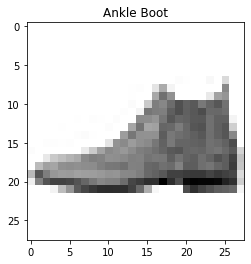


Most likely apparel in image: Ankle Boot, with 99.50% confidence




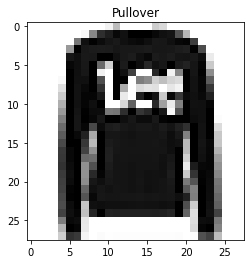


Most likely apparel in image: Pullover, with 99.78% confidence




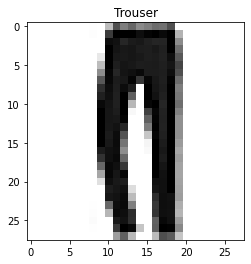


Most likely apparel in image: Trouser, with 100.00% confidence




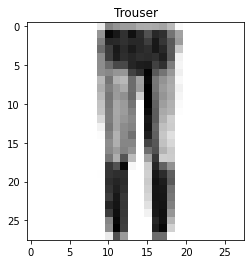


Most likely apparel in image: Trouser, with 100.00% confidence




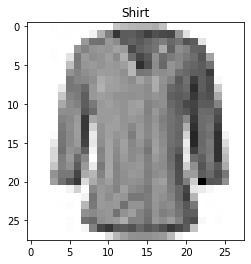


Most likely apparel in image: Shirt, with 92.01% confidence




In [32]:
for i in range(5):
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.title(class_names[test_labels[i]])
  plt.show()
  class_likely = class_names[np.argmax(prediction[i])]
  print(f"\nMost likely apparel in image: {class_likely}, with {np.max(prediction[i])*100:.2f}% confidence\n\n")